In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from cpdetect import cpDetector
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import *
try:
    import cPickle as pickle
except:
    import pickle

In [2]:
# Generate random trajectories
sizes = np.random.randint(10, 1000, 60)
means = np.random.uniform(low=8, high=9, size=60)
variances = np.random.uniform(low=0.2, high=0.3, size=60)

samples = [np.random.lognormal(means[i], variances[i], sizes[i]) for i in range(len(sizes))]

In [3]:
chunks = np.random.randint(3, 30, 100)

In [4]:
trajs = []
step = {}
tru_ts = {}
choice = []
for i, chunk in enumerate(chunks):
    choices = (np.random.choice(range(50), size=chunk))
    choice.append(choices)
    ts = [sizes[c] for c in choices]
    tru_ts['traj_{}'.format(str(i))] = np.cumsum(ts)
    to_concat = tuple(samples[c] for c in choices)
    trajs.append(np.concatenate(to_concat))
    step_function = tuple(np.exp(means[c])*np.ones(sizes[c]) for c in choices)
    step['traj_{}'.format(str(i))] = np.concatenate(step_function)

/Users/sternc1/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


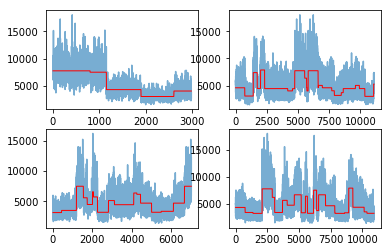

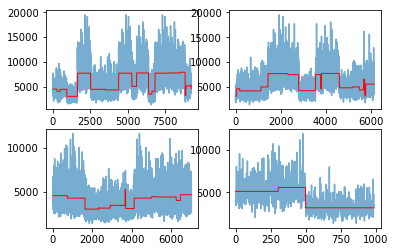

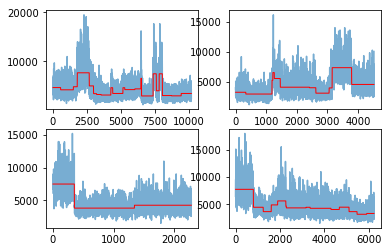

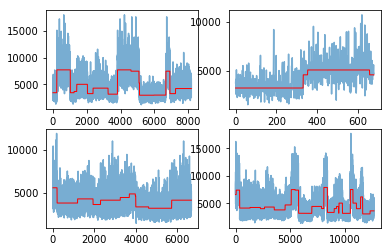

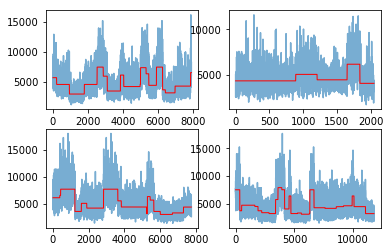

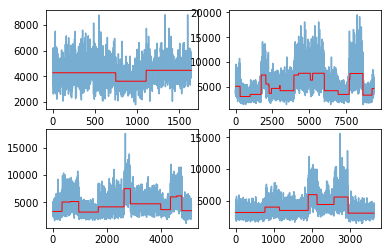

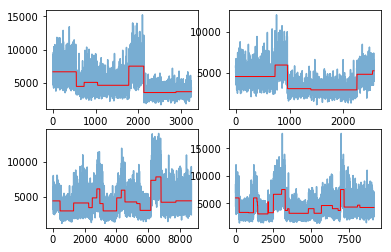

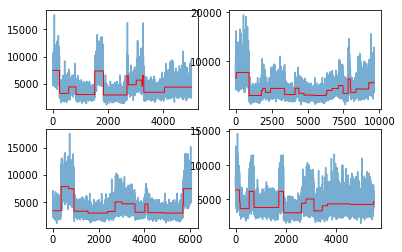

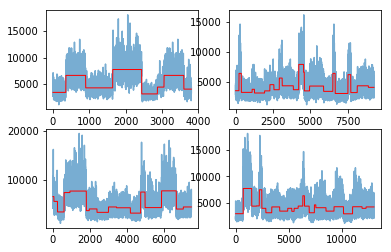

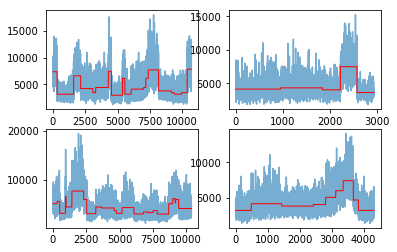

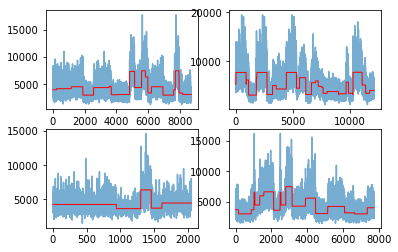

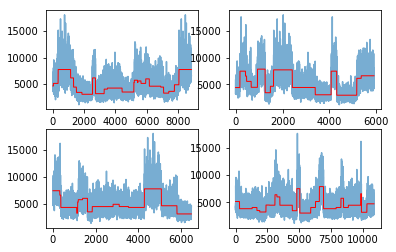

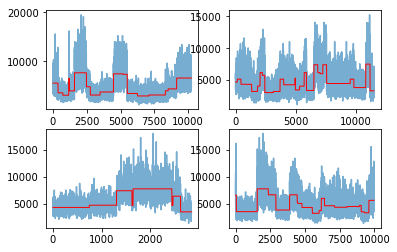

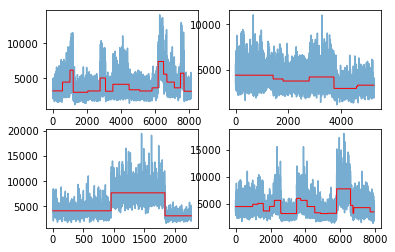

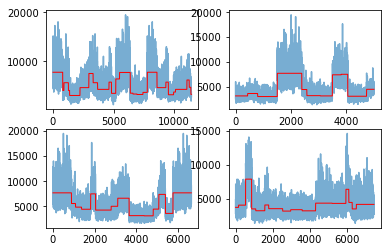

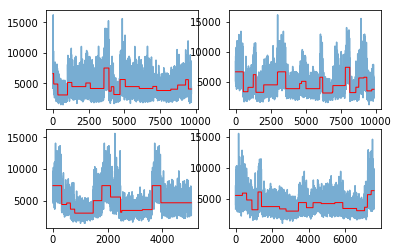

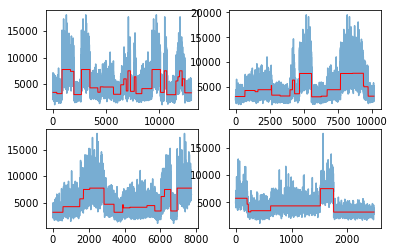

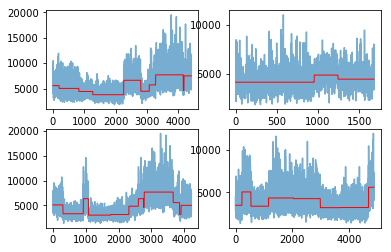

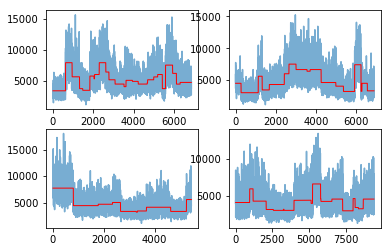

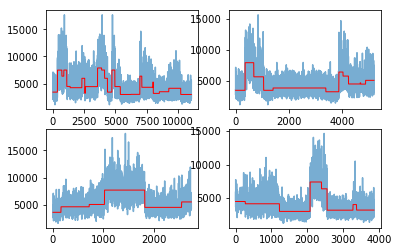

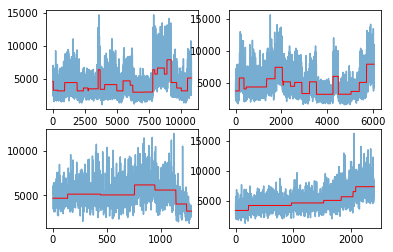

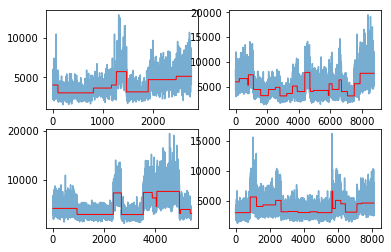

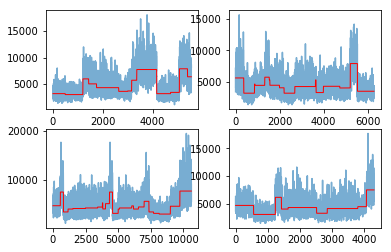

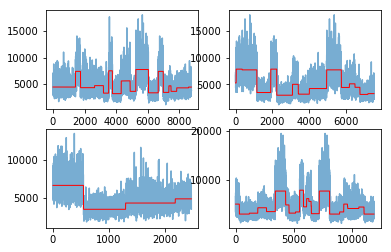

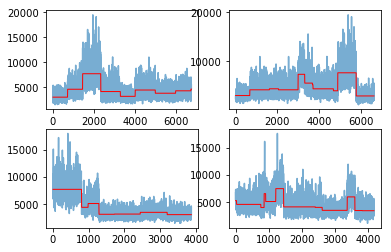

In [15]:
filename = 'synthetic.pdf'
with PdfPages(filename) as pdf:
    for i in range(25):
        fig = plt.figure()
        for j in range(4):
            ax = fig.add_subplot(2, 2, j+1)
            ax.plot(trajs[4*i + j], alpha=0.6)
            ax.plot(true_steps['traj_{}'.format(4*i+j)], color='red', linewidth=1.0)
        pdf.savefig(bbox_inches='tight')
        
#for i in range(100):
#    plt.figure()
#    plt.plot(trajs[i], alpha=0.8)
#    plt.plot(step['traj_{}'.format(i)], color='red', linewidth=1.0)
    #plt.vlines(tru_ts['traj_{}'.format(i)], ymin=0, ymax=20000)

In [ ]:
np.save(file='synthetic_trajs.np', arr=trajs)
pickle.dump(tru_ts, open('true_ts.pickle','wb'))
pickle.dump(step, open('step_synthetic.pickle', 'wb'))